In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.7.6 64bit [Clang 11.0.0 (clang-1100.0.33.16)]
IPython,7.12.0
OS,Darwin 19.3.0 x86_64 i386 64bit
numpy,1.18.1
dlib,19.19.0
matplotlib,3.1.3
imageio,2.6.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,1.4.0
torchvision,0.5.0


## loading the model

In [3]:
from gaze import init, ML
args = init(no_cuda=True, batch_size=64, verbose=0)
ml = ML(args)
path = '_Regard_400.pt'
ml.train(path=path)

Loading file _Regard_400.pt


In [4]:
ml.device

device(type='cpu')

## running the forward model on the extracted faces

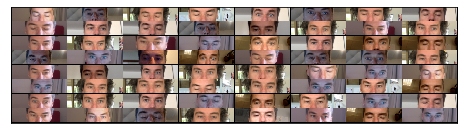

In [5]:
%matplotlib inline
fig, ax =  ml.dataset.show()

In [6]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [7]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=93.8%


In [8]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

blink  left blink blink right center blink blink blink  left blink right center center right  left right center right blink center right center blink  left right right center blink  left center center center right right right right blink  left blink center center right blink center right center blink center right right blink right  left  left blink  left center blink center  left  left blink right


In [9]:
fig, ax = ml.show(only_wrong=True)

modification gaze.py ligne 343

In [10]:
fig, ax = ml.show(only_wrong=False)

## cross-validation

In [11]:
import os
fname = 'figures/accuracy'
if not os.path.exists(fname + '.pdf'):
    args = init(verbose=0, log_interval=0, epochs=20)
    args['N_cv'] = 5 # 20
    from gaze import MetaML
    mml = MetaML(args)
    Accuracy = mml.protocol(args, 42)
    print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(figsize=((8, 5)))
    n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
    ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
    ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
    ax.vlines(100, 0, n.max(), 'k', label='max')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Smarts')
    ax.legend(loc='best')
    #plt.show() 
    for ext in ['.pdf', '.png']:
        plt.savefig(fname + ext)

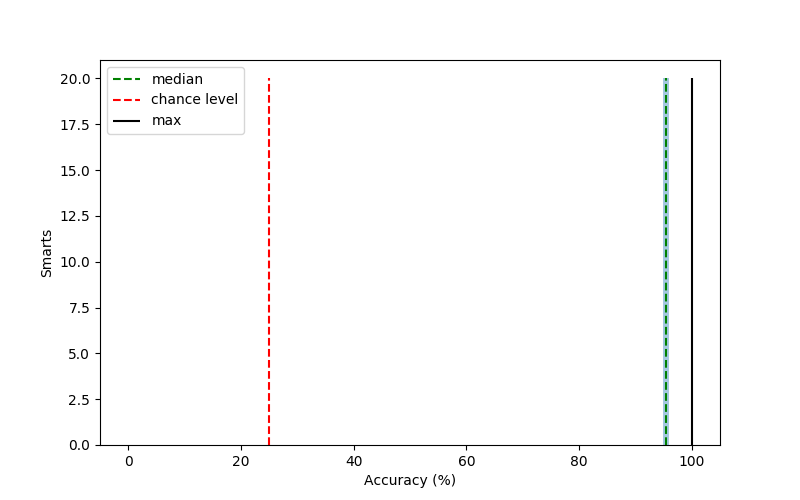

In [12]:
from IPython.display import Image
Image(filename=fname + '.png') 